# Global Power Plant Database

### Problem Statement:

Description

   The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
    
#### Key attributes of the database

The database includes the following indicators:

* `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
* `country_long` (text): longer form of the country designation
* `name` (text): name or title of the power plant, generally in Romanized form
* `gppd_idnr` (text): 10 or 12 character identifier for the power plant
* `capacity_mw` (number): electrical generating capacity in megawatts
* `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
* `primary_fuel` (text): energy source used in primary electricity generation or export
* `other_fuel1` (text): energy source used in electricity generation or export
* `other_fuel2` (text): energy source used in electricity generation or export
* `other_fuel3` (text): energy source used in electricity generation or export
* `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
* `owner` (text): majority shareholder of the power plant, generally in Romanized form
* `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
* `url` (text): web document corresponding to the `source` field
* `geolocation_source` (text): attribution for geolocation information
* `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
* `year_of_capacity_data` (number): year the capacity information was reported
* `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
* `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
* `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
* `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
* `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
* `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
* `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
* `generation_data_source` (text): attribution for the reported generation information
* `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
* `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
* `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
* `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
* `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
* `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
* `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
* `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
* `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
* `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

-- Dropping the columns which may not be helpful for prediction:
 * no population at all: "other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019" & "estimated_generation_gwh".
 * have only 1 unique value: "country","country_long","other_fuel2","year_of_capacity_data" & "generation_data_source.
 * Have 907 unique values : "name","gppd_idnr"

In [6]:
data.shape

(907, 27)

In [7]:
data.drop(columns=["other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [8]:
data.drop(columns=["country","country_long","other_fuel2","year_of_capacity_data","generation_data_source","name","gppd_idnr"],axis=1,inplace=True)

In [9]:
data.shape

(907, 15)

In [10]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [11]:
data.drop(columns=["owner","url"],axis=1,inplace=True) # Dropping irrelavent cols's

In [12]:
data.shape

(907, 13)

In [13]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [14]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

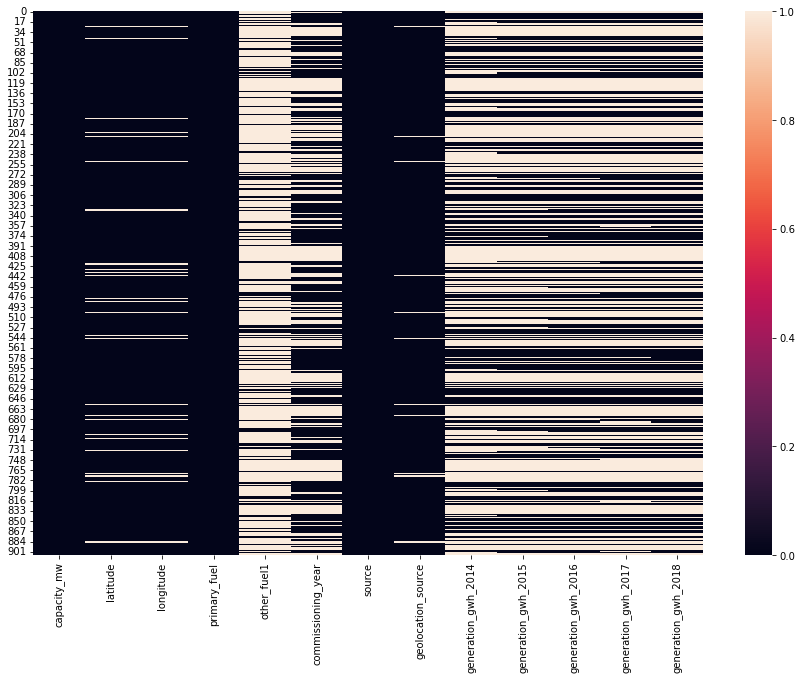

In [16]:
#Visualizing Missing values for a better understanding
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

* So, here we can visualize and deside a lot of missing values are there in the data and we need to replace numeric missing data with their median.

In [17]:
data.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [18]:
data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

### Replacing the null values accordingly

In [19]:
# Not Skewed so replacing null val's with mean
data["latitude"] = data['latitude'].fillna(data['latitude'].mean()) 

# Skewed numeric data so replacing null val's with median
data['longitude'] = data['longitude'].fillna(data['longitude'].median()) 
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())
data["generation_gwh_2014"] = data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].median())
data["generation_gwh_2015"] = data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].median())
data["generation_gwh_2016"] = data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].median())
data["generation_gwh_2017"] = data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].median())
data["generation_gwh_2018"] = data["generation_gwh_2018"].fillna(data["generation_gwh_2018"].median())


 # Skewed and obj. data so replacing null val's with its mode.
data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])


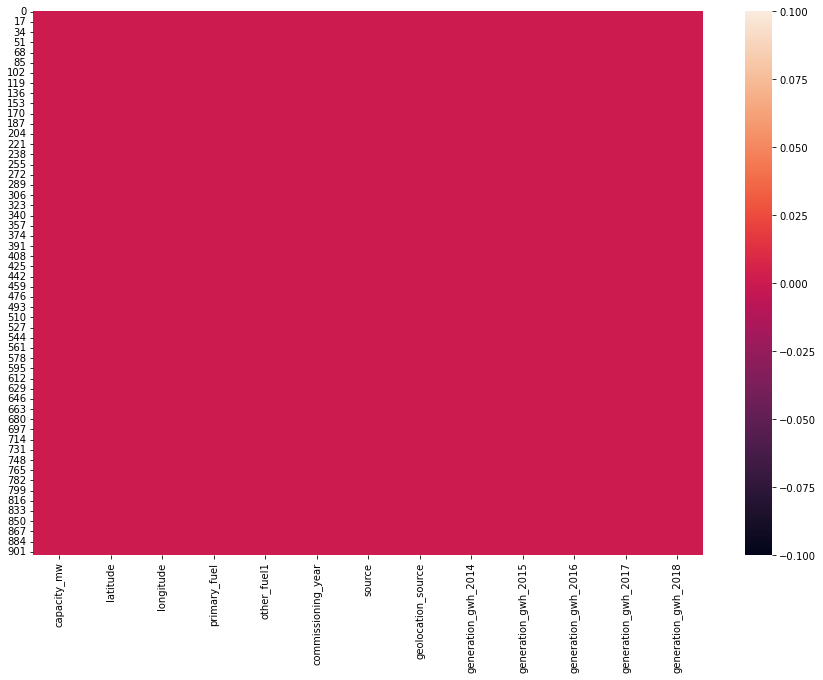

In [20]:
#Visualizing Missing values for a better understanding
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull())
plt.show()

so, No missing values 

##### Separating categorical and numerical columns

In [21]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
data['Power_plant_age'] = 2018 - data['commissioning_year']
data.drop(columns=['commissioning_year'],inplace=True)

In [22]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [23]:
# Statistical summary of dataset
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


#### Observations:

* counts of the col's are same i.e., "NO MISSING VALUES"
* mean > median(50%) --> data is skewed to right
* median > mean --> data is skewed to left
* max - 75% = is huge so have some outlier's


##### Separating categorical and numerical columns

In [24]:
# Checking for Categorical columns
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [25]:
# Checking for Numerical columns
numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

## Univariate Analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

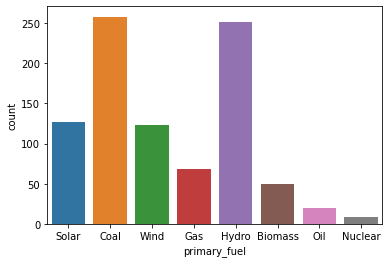

In [26]:
sns.countplot(data['primary_fuel'])

<AxesSubplot:ylabel='count'>

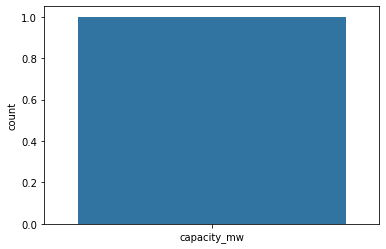

In [27]:
sns.countplot(['capacity_mw'])

### Visualizing the Skewness

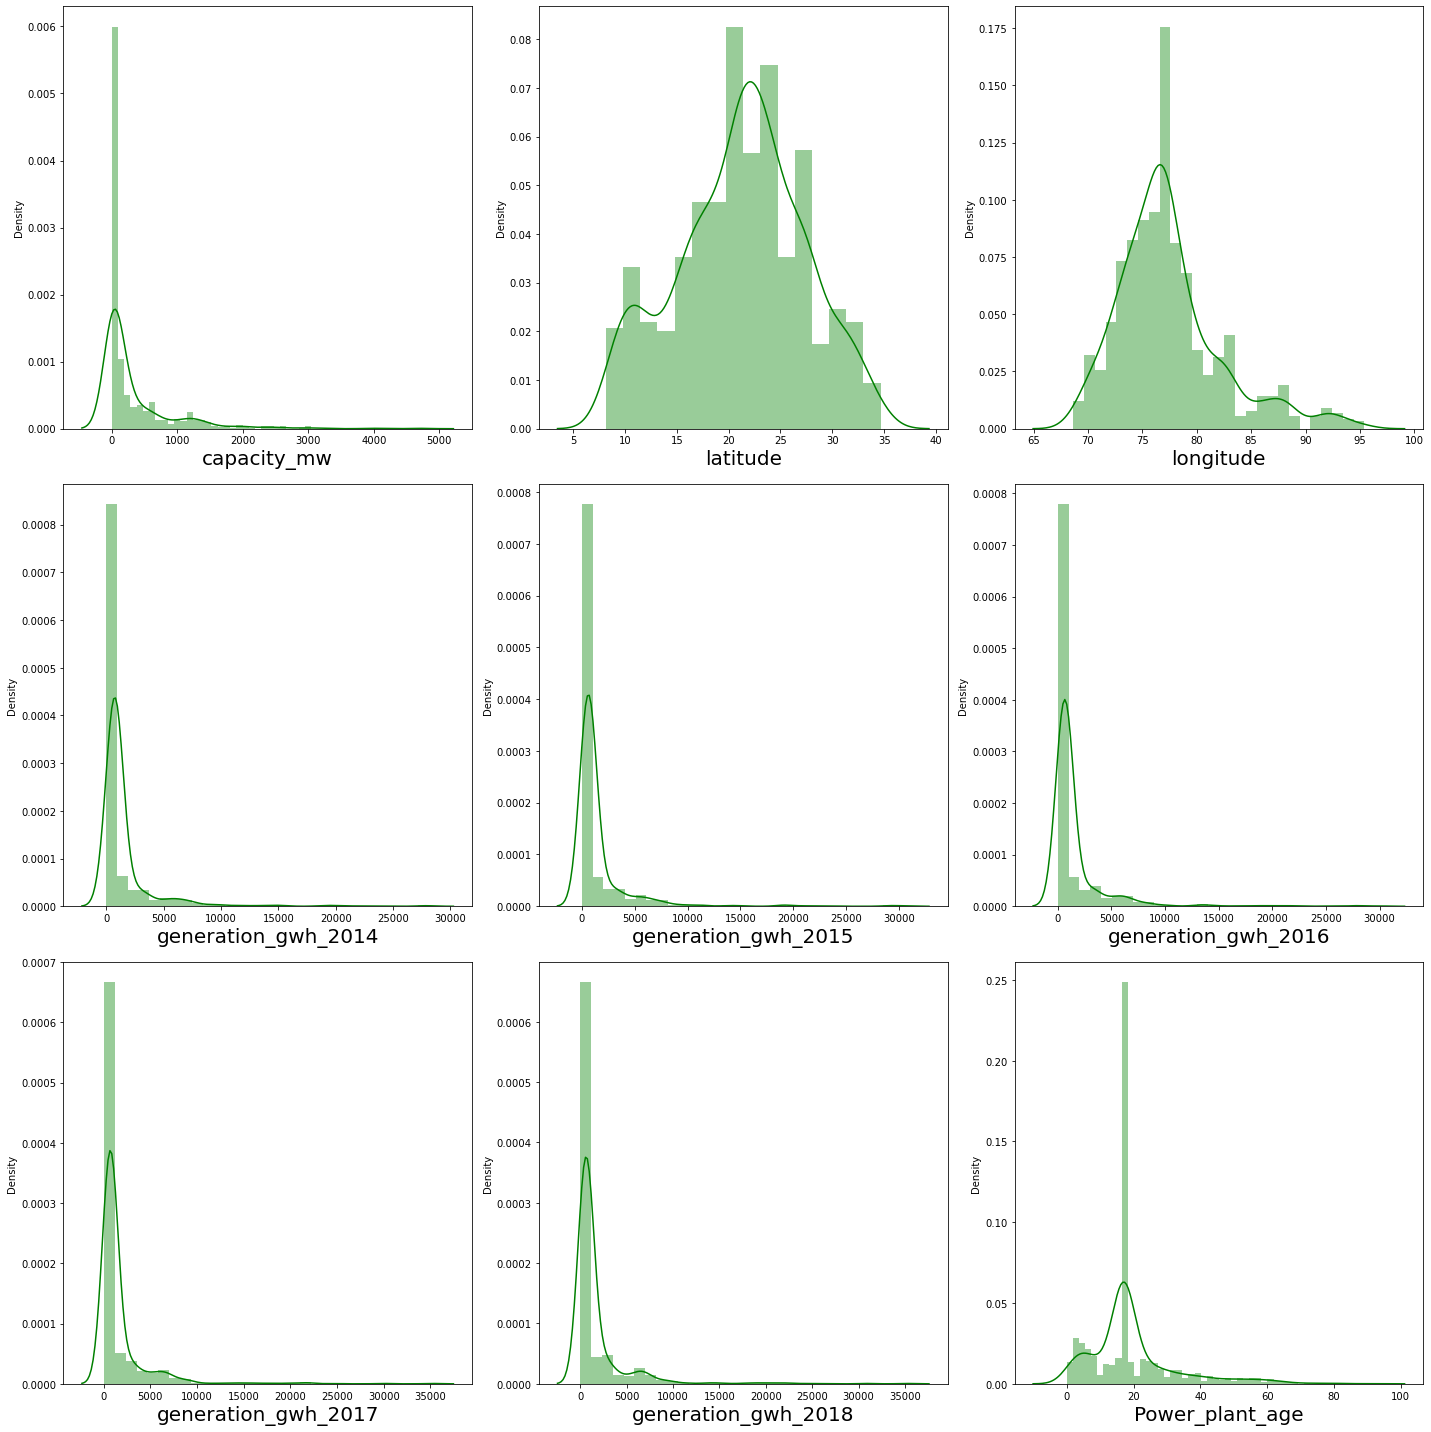

In [28]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

### Comparing target variable (Primary_fuel) with other features

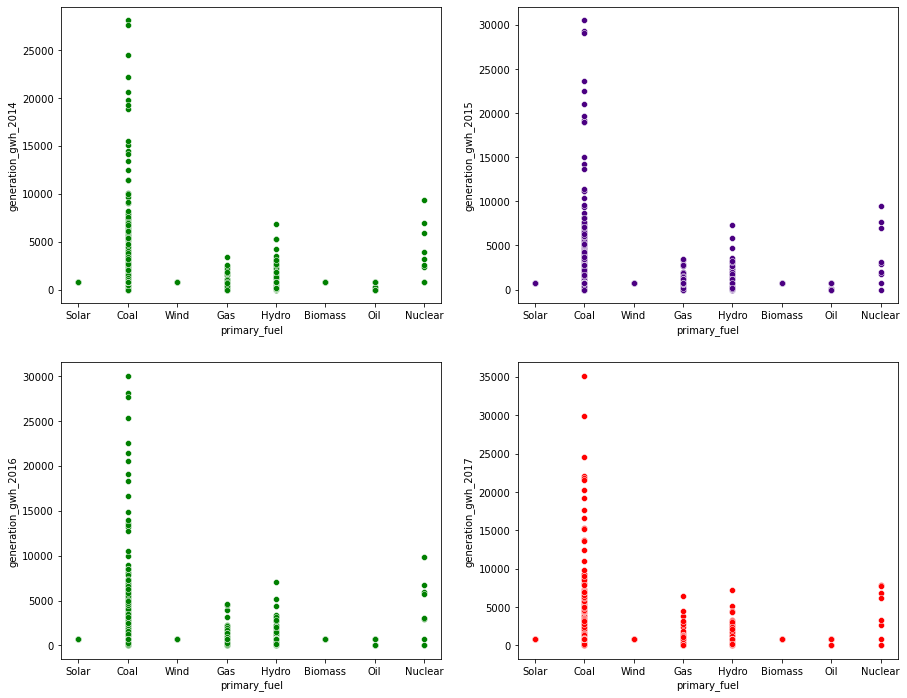

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(y='generation_gwh_2014',x='primary_fuel',ax=axes[0,0],data=data,color="g")

# Checking generation growth in 2015
sns.scatterplot(y='generation_gwh_2015',x='primary_fuel',ax=axes[0,1],data=data,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(y='generation_gwh_2016',x='primary_fuel',ax=axes[1,0],data=data,color="g")

# Checking generation growth in 2017
sns.scatterplot(y='generation_gwh_2017',x='primary_fuel',ax=axes[1,1],data=data,color="r")
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='Power_plant_age'>

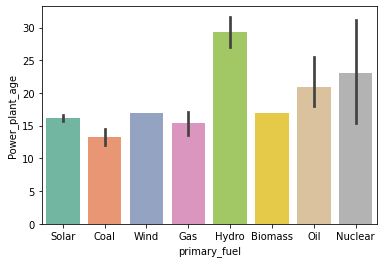

In [30]:
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = data,palette="Set2")

### Comparing target variable (capacity_mw) with other features

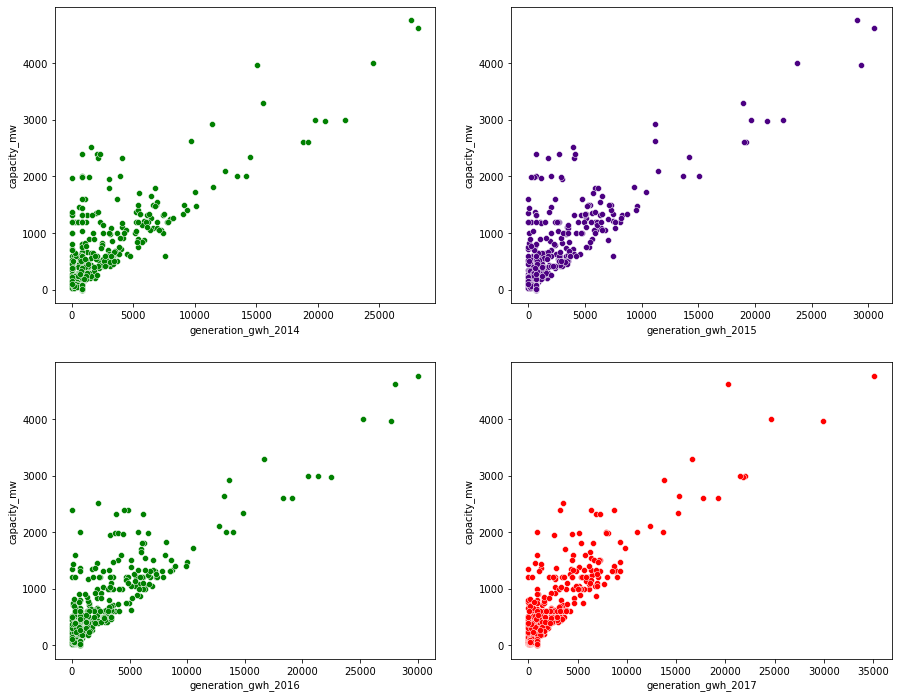

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=data,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=data,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=data,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=data,color="r")
plt.show()

 * Have a positive linear relation between "generation_gwt_yr" and "capacity_mw"

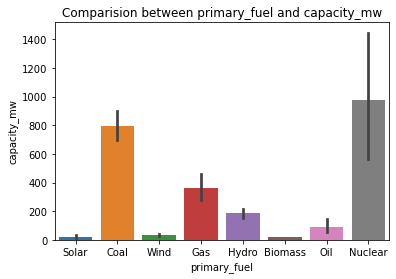

In [32]:
#Lets check the relation between primary_fuel and capacity_mw

plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

# Multivariate Analysis

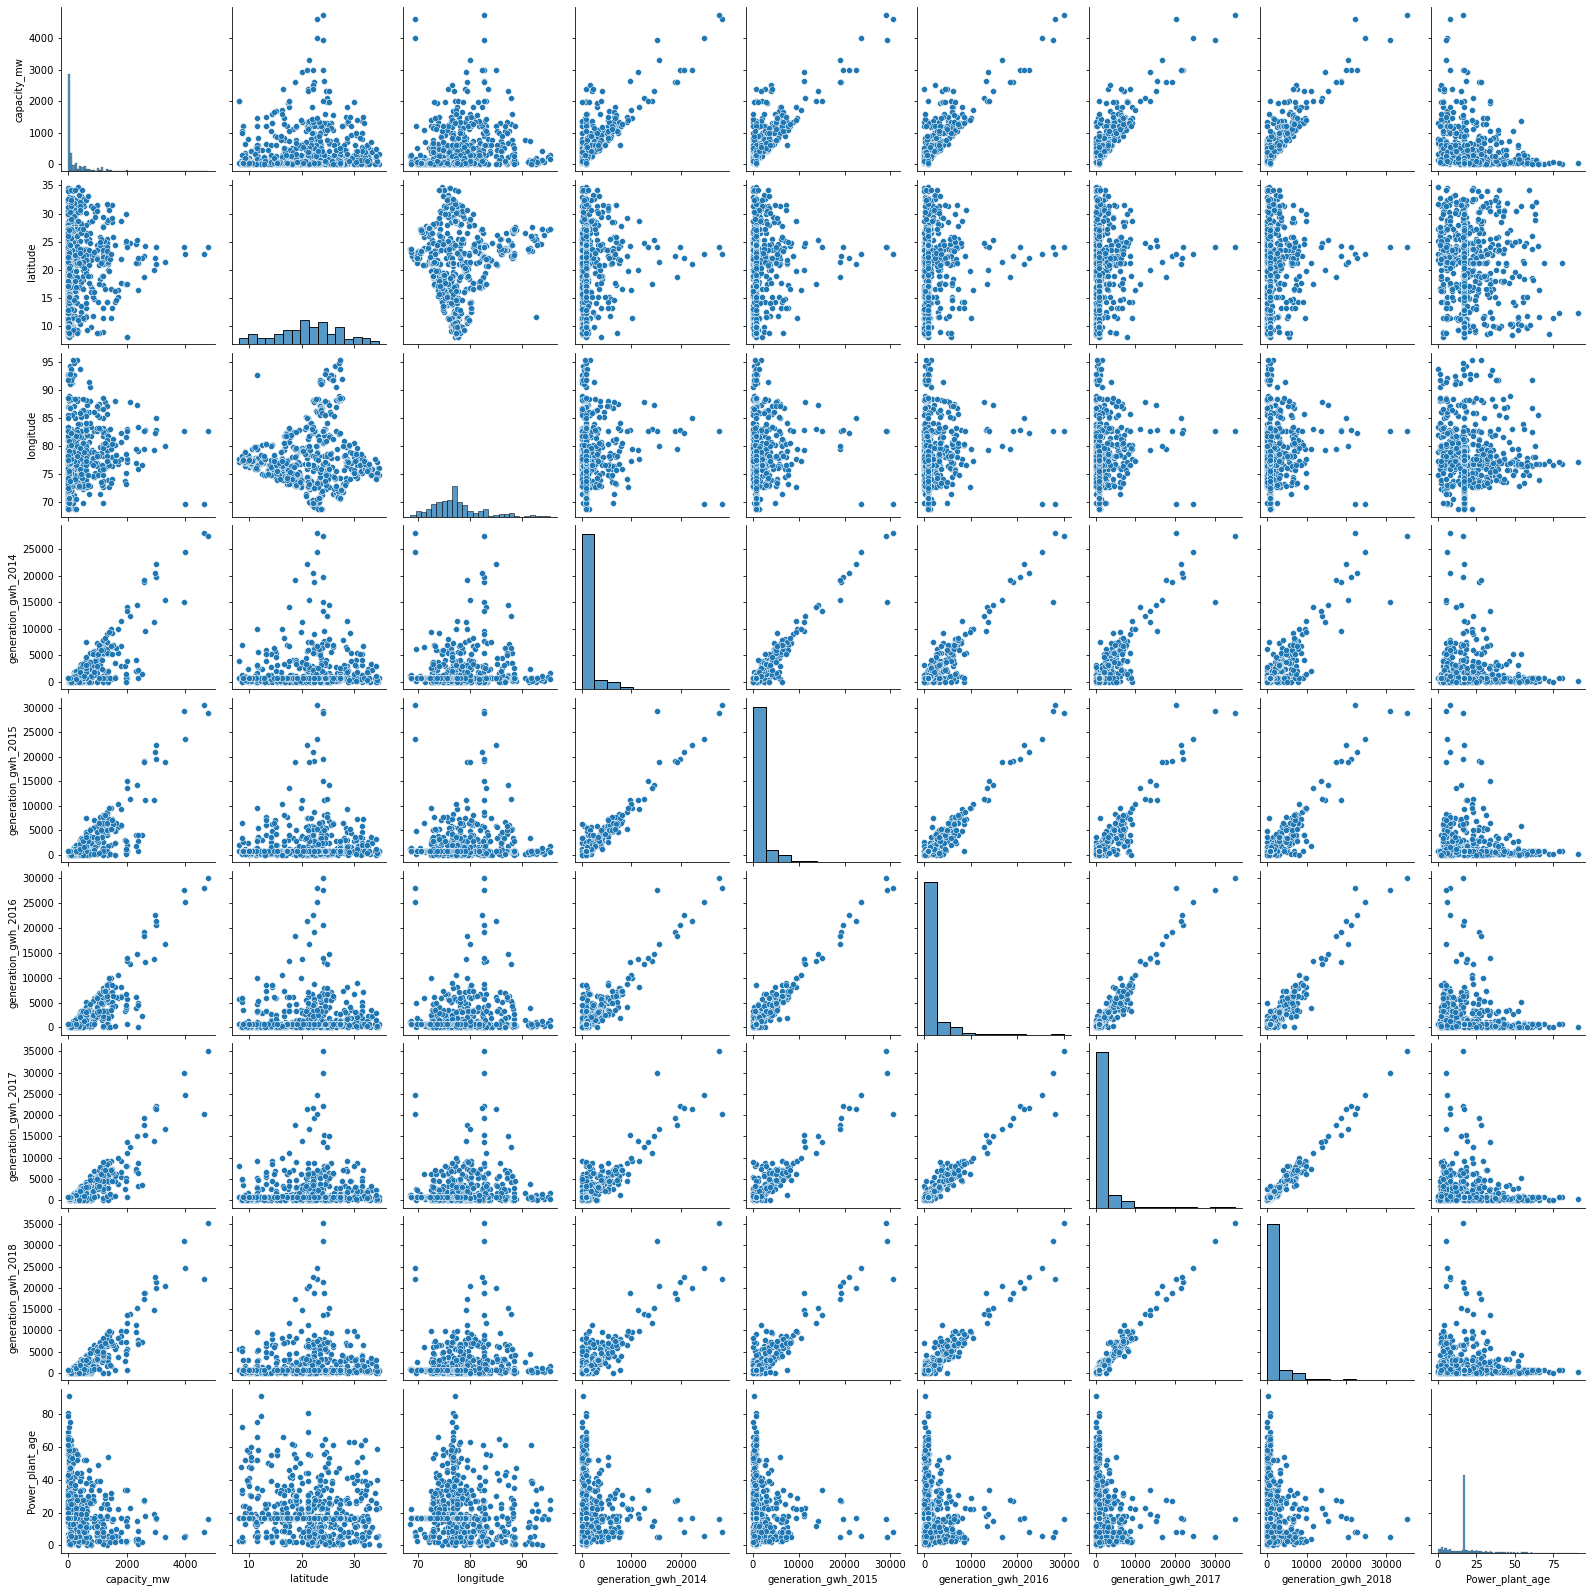

In [33]:
sns.pairplot(data)

# Checking for Outliers

capacity_mw               AxesSubplot(0.125,0.125;0.0731132x0.755)
latitude               AxesSubplot(0.212736,0.125;0.0731132x0.755)
longitude              AxesSubplot(0.300472,0.125;0.0731132x0.755)
generation_gwh_2014    AxesSubplot(0.388208,0.125;0.0731132x0.755)
generation_gwh_2015    AxesSubplot(0.475943,0.125;0.0731132x0.755)
generation_gwh_2016    AxesSubplot(0.563679,0.125;0.0731132x0.755)
generation_gwh_2017    AxesSubplot(0.651415,0.125;0.0731132x0.755)
generation_gwh_2018    AxesSubplot(0.739151,0.125;0.0731132x0.755)
Power_plant_age        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

<Figure size 1584x504 with 0 Axes>

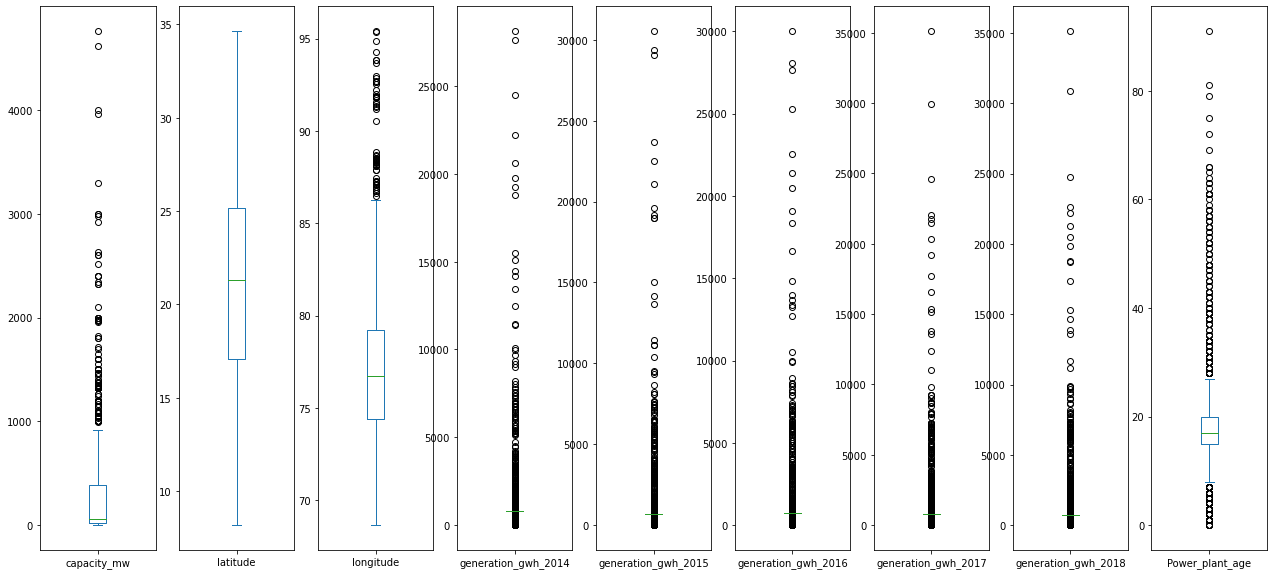

In [34]:
#check for outlier's
plt.figure(figsize=(22,7))
data.plot(kind='box',subplots=True,figsize=(22,10))


In [35]:
#Removing outlier's
# Features having outliers
features = data[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [36]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [37]:
# Checking the dimensions of both the dataframes
print(data.shape)
print(new_df.shape)

(907, 13)
(851, 13)


In [38]:
#Percentage of data lost when outlier is removed.
loss = (907-851)/907*100
loss

6.174200661521499

## Encoding the categorical columns using Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df['primary_fuel'] = lbl.fit_transform(new_df['primary_fuel'])
new_df['other_fuel1'] = lbl.fit_transform(new_df['other_fuel1'])
new_df['source'] = lbl.fit_transform(new_df['source'])
new_df['geolocation_source'] = lbl.fit_transform(new_df['geolocation_source'])
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# Correlation

In [40]:
# Checking the correlation between features and label
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


### Correlation matrix using heatmap

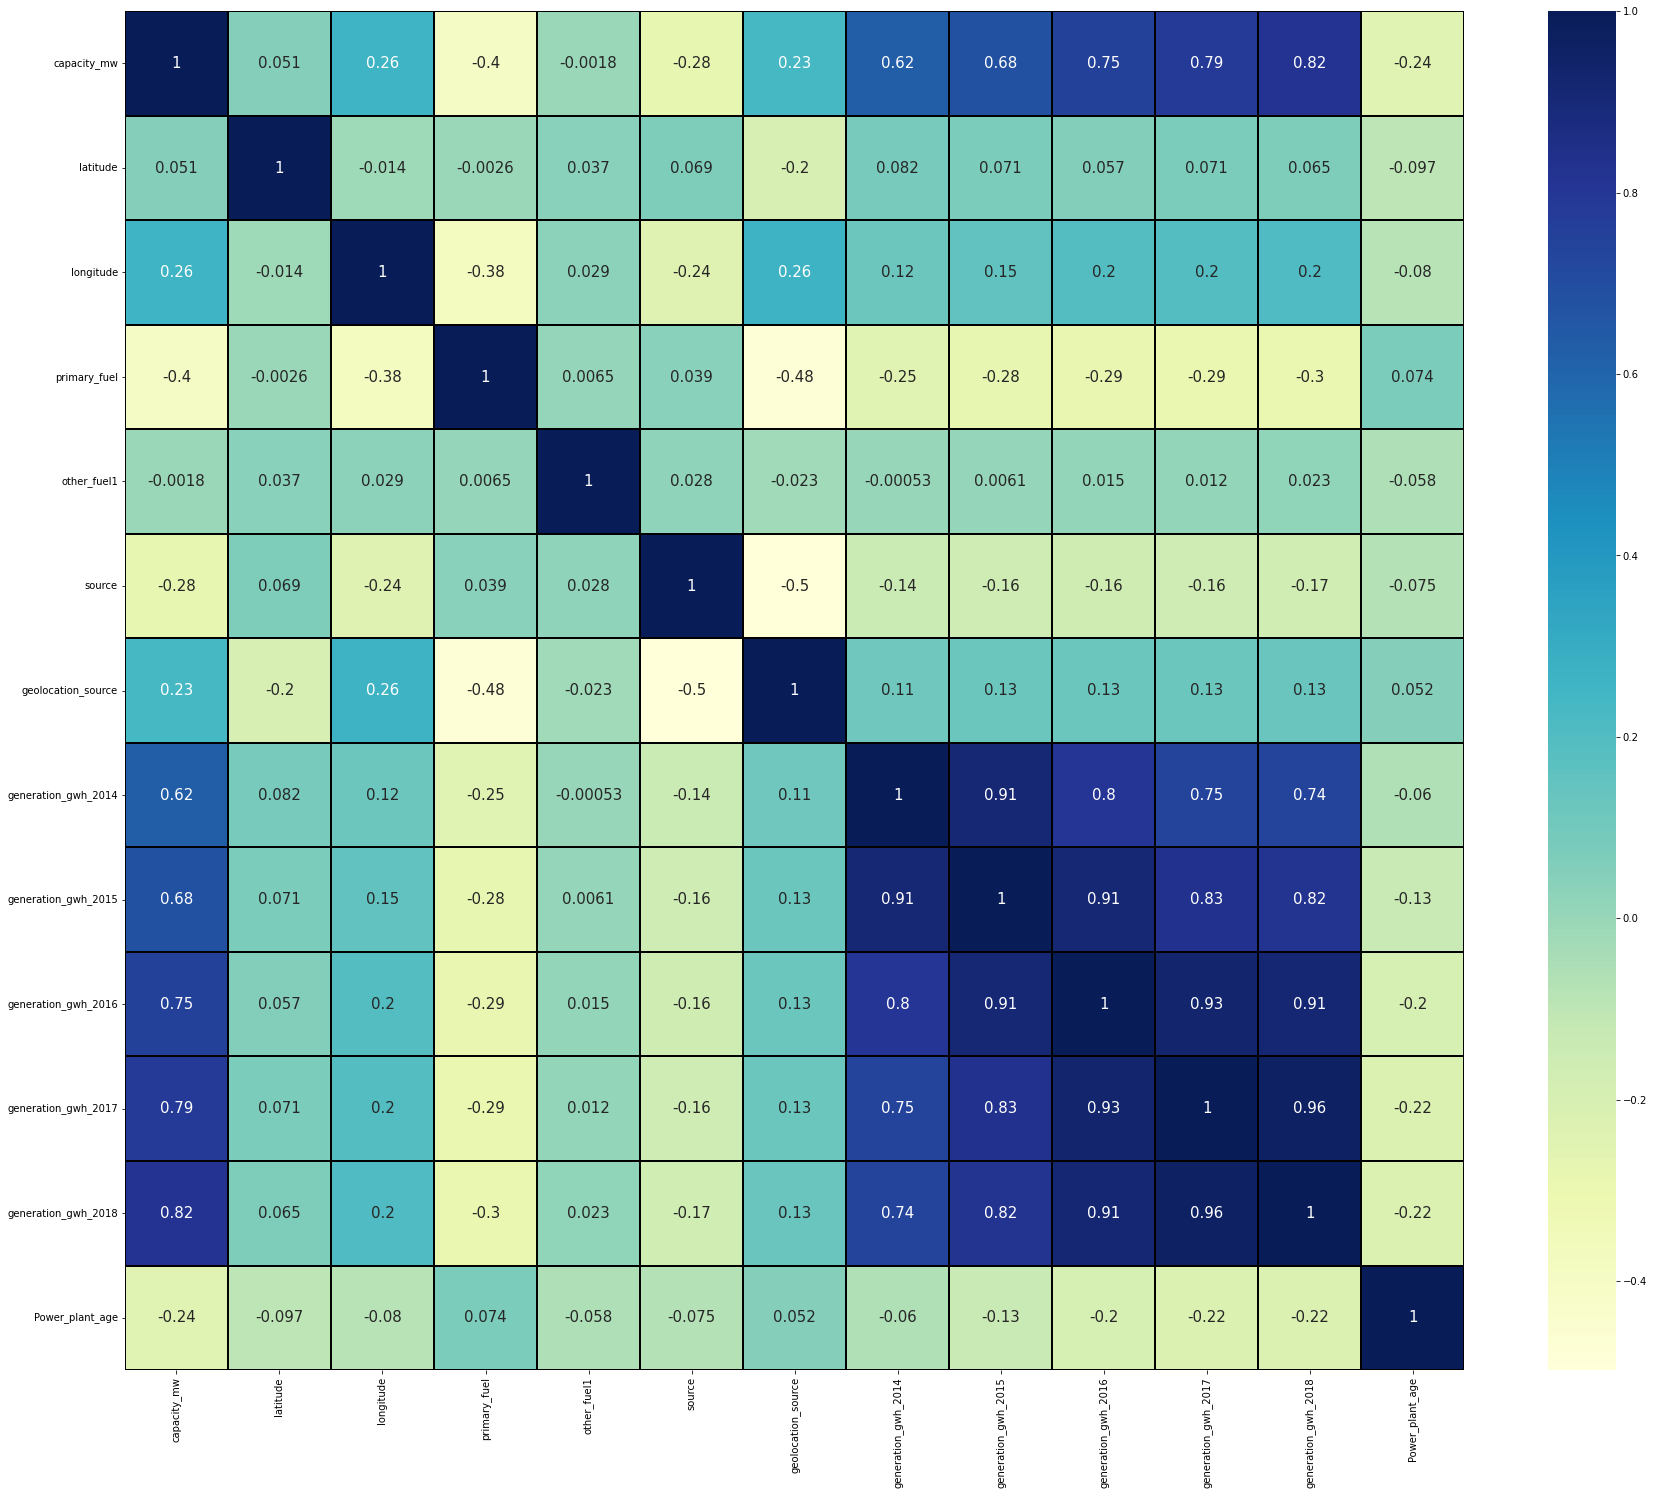

In [41]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True,linecolor='black',fmt='.2g',annot_kws={'size':15},cmap="YlGnBu")
plt.show()

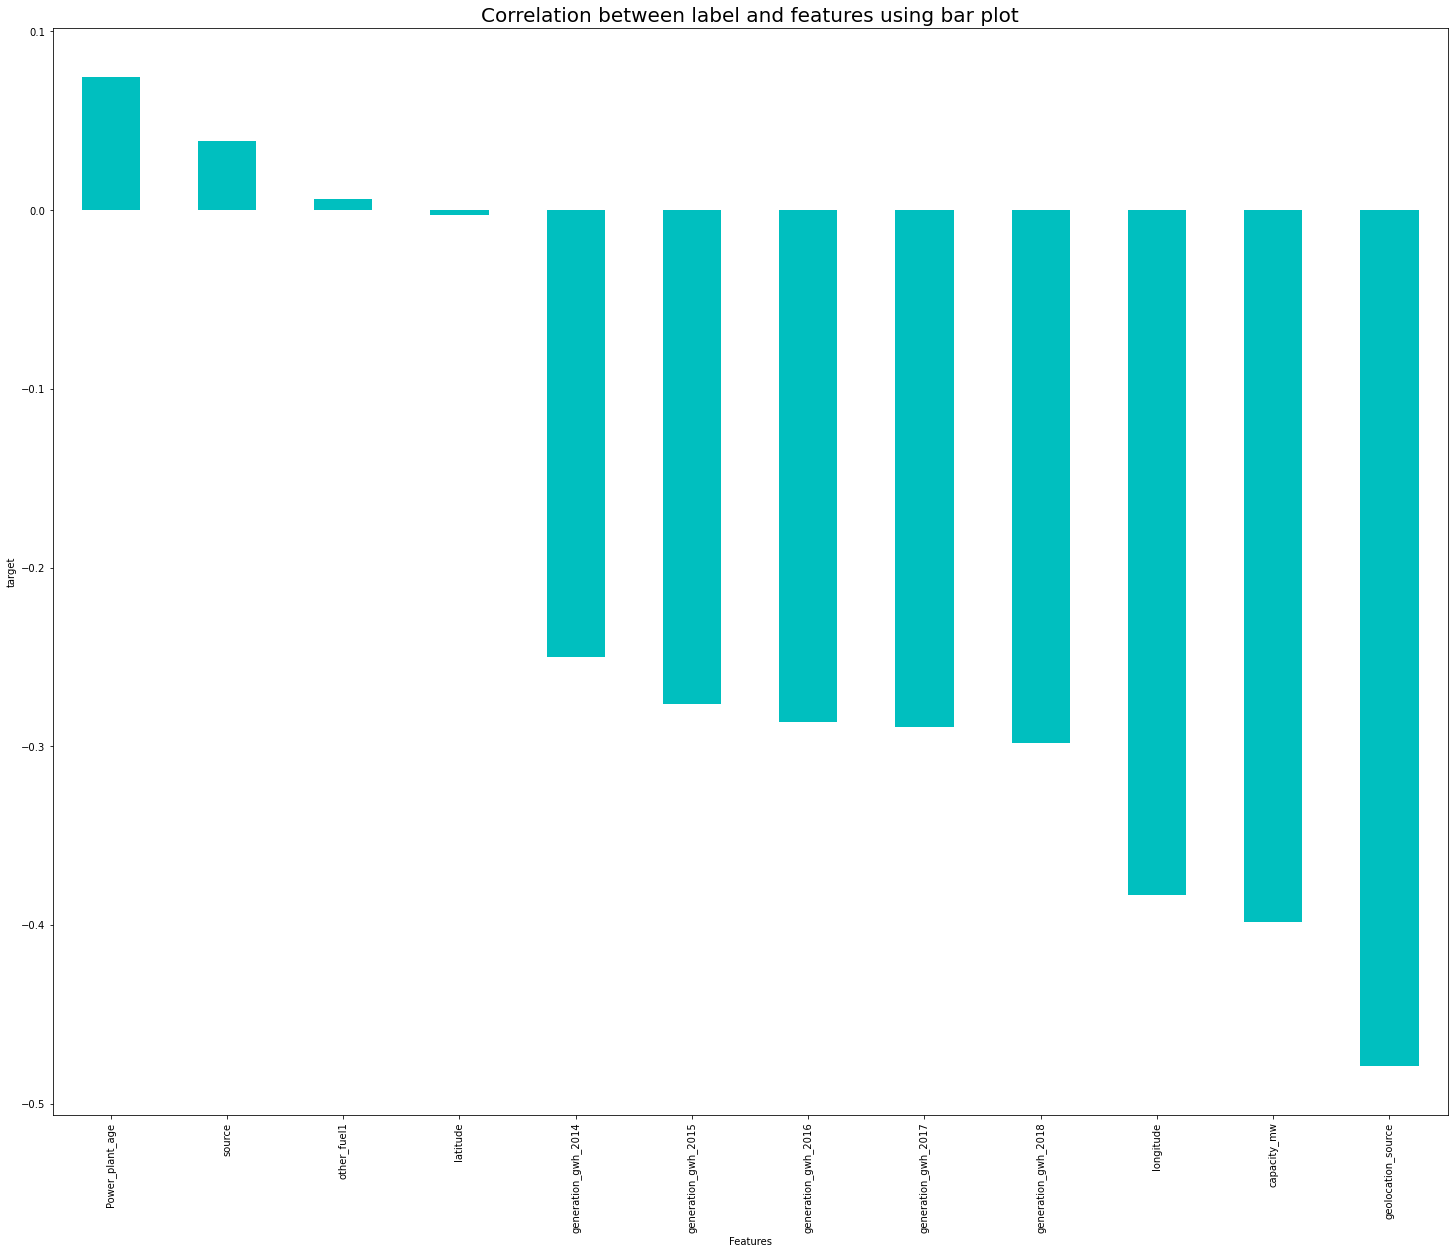

In [42]:
plt.figure(figsize=(25,20))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between label and features using bar plot',fontsize=20)
plt.show()

* From the bar graph we can identify the very less correlated var's and can drop them.

In [43]:
# Dropping very less correlated columns as they will not effect the target
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [44]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [45]:
new_df.shape

(851, 11)

# Prediction for capacity_mw

#### Separating the features and label

In [46]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [47]:
x.shape

(851, 10)

In [48]:
y.shape

(851,)

### Checking for Skewness

In [49]:
# Checking for skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [50]:
skewed_features = ['longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [52]:
x[skewed_features] = scaler.fit_transform(x[skewed_features].values)
x[skewed_features].head()

,longitude,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.528061,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,1.981788,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.488176,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.421677,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.421677,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [53]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                -0.173043
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

 * We can observe that the skewness is removed.

## Feature Scaling using Standard Scalarization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.528061,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,1.981788,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.421677,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.421677,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.421677,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,1.158844,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.856354,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


# Checking for MultiColinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.292291,longitude
1,1.630436,primary_fuel
2,1.289513,source
3,1.636259,geolocation_source
4,3.603294,generation_gwh_2014
5,6.180935,generation_gwh_2015
6,9.957609,generation_gwh_2016
7,9.749439,generation_gwh_2017
8,8.949946,generation_gwh_2018
9,1.102595,Power_plant_age


* Here we can observe that all the columns have (VIF<10) which means we are free from multicollinearity problem. Let's move to buliding machine learning models.

# Modeling

### Finding the best random state

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8597177727866927 at Random_state 185


## Creating new train test split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithm

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

# RandomForestRegressor

In [60]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8717502428275798
MAE: 80.18140697112341
MSE: 24229.60706244511
RMSE: 155.65862347600634


# DecisionTreeRegressor

In [61]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.6893508493211201
MAE: 110.055732421875
MSE: 58689.44332668262
RMSE: 242.25904178519863


# KNeighbors Regressor

In [62]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE:",metrics.mean_absolute_error(y_test,predknn))
print("MSE:",metrics.mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.7941608632480783
MAE: 102.721746875
MSE: 38888.19372084156
RMSE: 197.20089685607812


# GradientBoosting Regressor

In [63]:
# Checking R2 score for KNN Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.852442655004158
MAE: 89.61092082153988
MSE: 27877.296357140818
RMSE: 166.96495547611426


# BaggingRegressor

In [64]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.846180095522978
MAE: 87.79372976444128
MSE: 29060.45146620025
RMSE: 170.4712628750085


# Checking the cross validation score

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7824426452957058


In [67]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.609769045428884


In [68]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7262277843149538


In [69]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7262277843149538


In [70]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.7510720479370298


In [71]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7742721599539815


* From the above observation, the difference between R2score and the cross validation score we conclude that RandomForestRegressor as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

# Hyper parameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [74]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [76]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

These are the best parameter values for RandomForestRegressor

In [77]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 155.65862347600634
R2_Score: 88.07754554666491


# Saving the model

In [78]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [79]:
capacity = joblib.load("Global_Power_Plant_capacity_mw.pkl")

In [80]:
import numpy as np
a = np.array(y_test)
predicted = np.array(capacity.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,20.00,46.373352
1,9.90,36.691868
2,75.00,126.661988
3,25.00,379.410742
4,300.00,380.257356
...,...,...
251,20.00,45.234468
252,56.25,36.085177
253,45.00,139.657402
254,100.80,35.012038


# 2. Prediction for primary_fuel

### Separating features and labels

In [81]:
x_df = new_df.drop("primary_fuel",axis=1)
y_df = new_df["primary_fuel"]

In [82]:
x_df.shape

(851, 10)

In [83]:
y_df.shape

(851,)

# Checking for Skewness

In [84]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe skewness in almost all the columns. So except categorical columns, we will remove the skewness of all the rest columns.

# Removing Skewness

In [85]:
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','source','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [86]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,source,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,1.528061,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,1.981788,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-0.488176,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,-0.421677,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,-0.421677,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [87]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                -0.173043
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

We have removed the skewness from all numerical columns.

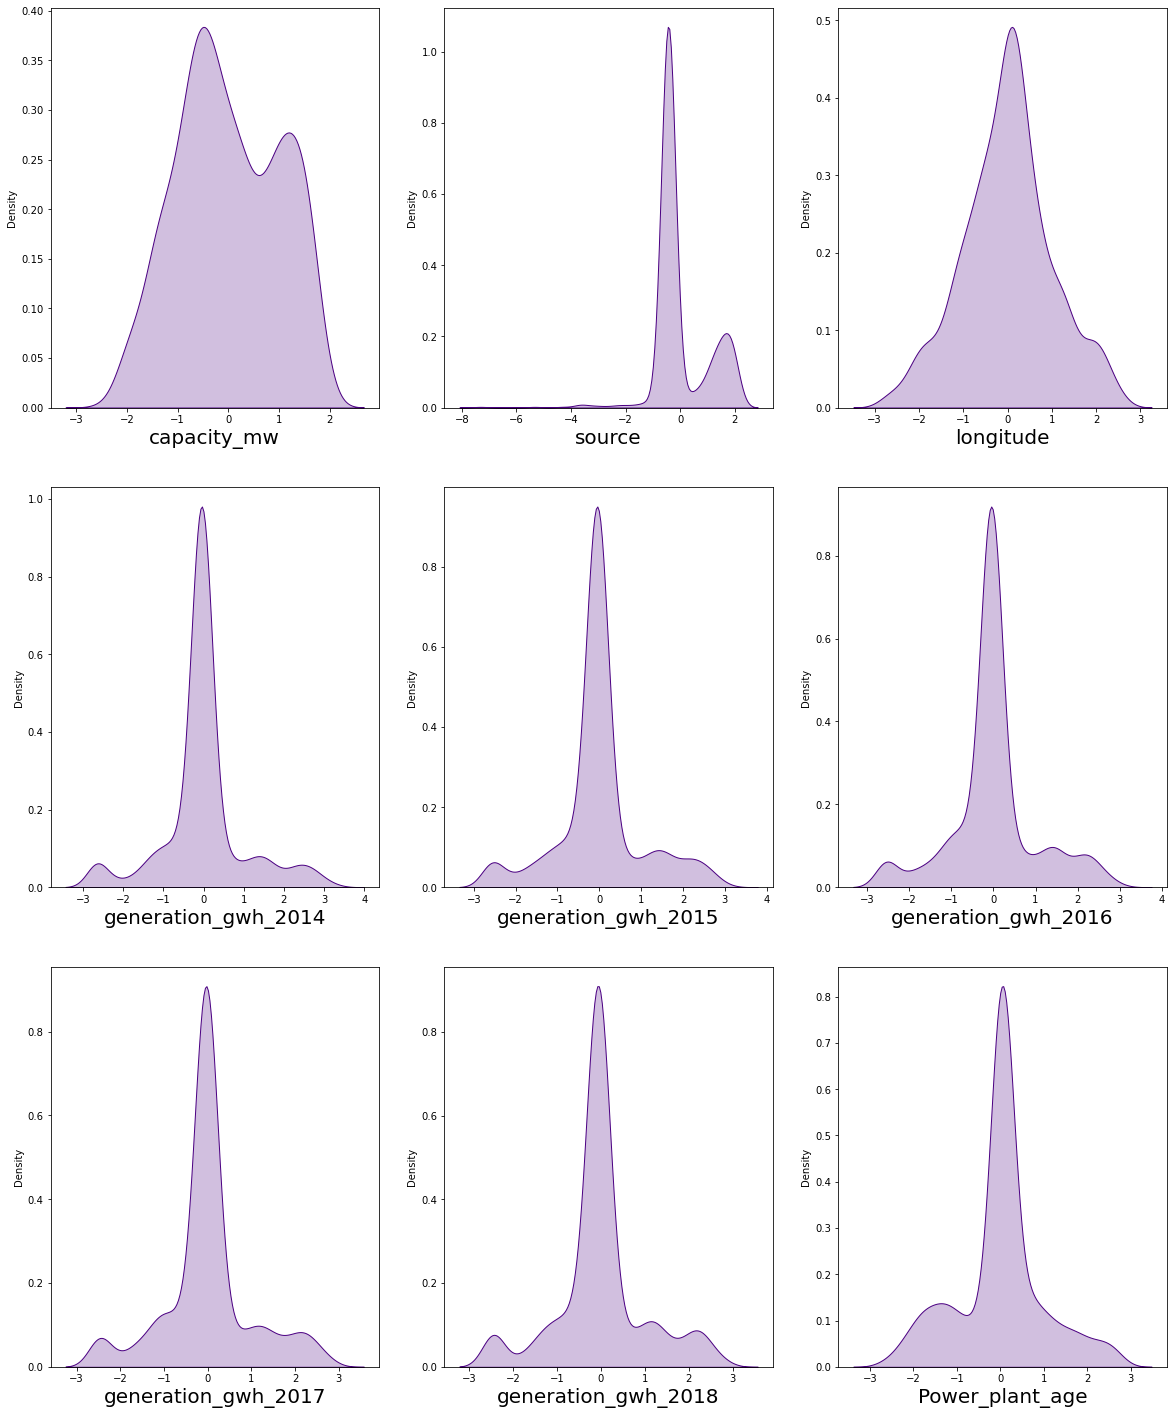

In [88]:
# Visualizing the distribution after removing skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skeweness has been removed.

# Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df),columns = x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.528061,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,1.981788,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.421677,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.421677,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.421677,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,1.158844,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.856354,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


We have scaled the data using Standard Scalarization to overcome the issue of Data biasness.

# Checking Multicolinearity

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.788620,capacity_mw
1,1.192044,longitude
2,1.234567,source
3,1.493391,geolocation_source
4,3.621400,generation_gwh_2014
5,6.190759,generation_gwh_2015
6,9.961280,generation_gwh_2016
7,9.765642,generation_gwh_2017
8,8.960965,generation_gwh_2018
9,1.152743,Power_plant_age


The VIF value is less than 10 in all the columns which means no multicolinearity issue.

In [91]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

* Here we can observe that the target variabe primary_fuel has multiclasses which means it is a  multiclassification problem.
* Also the data is not balanced so we will use oversampling method to balance the data.

# OverSampling

In [92]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df,y_df = SM.fit_resample(x_df,y_df)

In [93]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

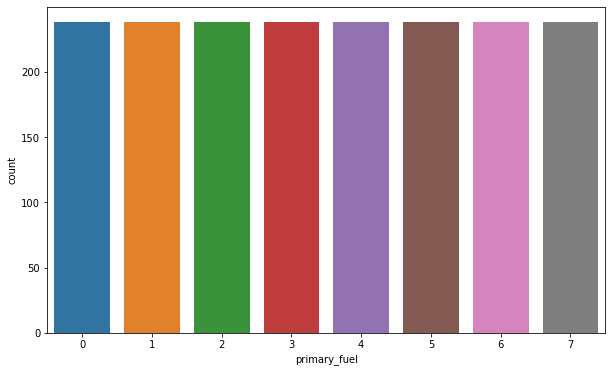

In [94]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [95]:
# DataFrame after preprocessing and data cleaning
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.528061,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,1.981788,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.488176,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.421677,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.421677,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


# Modeling

### Finding the best random state

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc = accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9090909090909091 at random_state 51


### Creating train_test_split

In [97]:
 x_df_train,x_df_test,y_df_train,y_df_test = TTS(x_df,y_df,test_size=.30,random_state=maxRS)

# Classification Algorithms

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# DecisionTreeClassifier

In [99]:
# Checking Accuracy for DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)
predDTC = DTC.predict(x_df_test)
print(accuracy_score(y_df_test,predDTC))
print(confusion_matrix(y_df_test,predDTC))
print(classification_report(y_df_test,predDTC))

0.8951048951048951
[[65  2  2  0  0  4  0  0]
 [ 3 43  2 12  6  2  0  0]
 [ 0  1 58  8  1  5  0  0]
 [ 0  1  3 48  1  0  0  0]
 [ 1  2  0  1 77  0  0  0]
 [ 1  1  0  0  0 63  0  0]
 [ 0  0  1  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        73
           1       0.86      0.63      0.73        68
           2       0.88      0.79      0.83        73
           3       0.70      0.91      0.79        53
           4       0.91      0.95      0.93        81
           5       0.85      0.97      0.91        65
           6       1.00      0.99      0.99        80
           7       1.00      1.00      1.00        79

    accuracy                           0.90       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.90      0.90      0.89       572



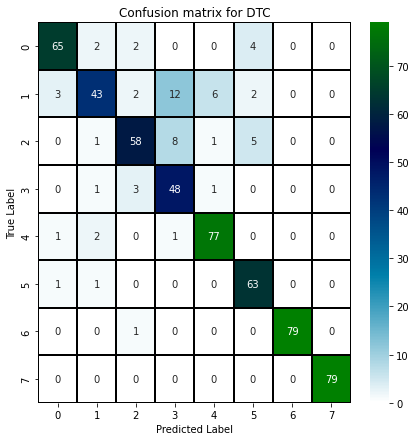

In [100]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for DTC")
plt.show()

# RandomForestClassifier

In [101]:
# Checking Accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)
predRFC = RFC.predict(x_df_test)
print(accuracy_score(y_df_test,predRFC))
print(confusion_matrix(y_df_test,predRFC))
print(classification_report(y_df_test,predRFC))

0.9335664335664335
[[71  1  0  0  0  1  0  0]
 [ 5 47  2 10  2  2  0  0]
 [ 0  3 60  5  0  5  0  0]
 [ 1  0  0 52  0  0  0  0]
 [ 0  0  0  0 81  0  0  0]
 [ 0  1  0  0  0 64  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.90      0.69      0.78        68
           2       0.97      0.82      0.89        73
           3       0.78      0.98      0.87        53
           4       0.98      1.00      0.99        81
           5       0.89      0.98      0.93        65
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        79

    accuracy                           0.93       572
   macro avg       0.93      0.93      0.93       572
weighted avg       0.94      0.93      0.93       572



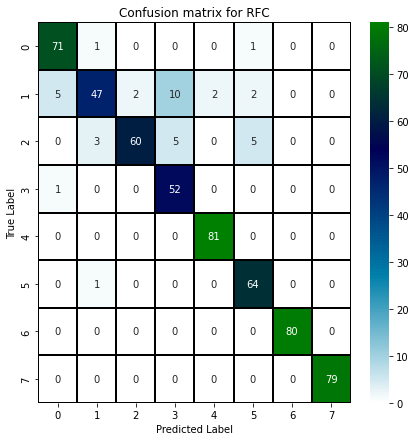

In [102]:
# Lets plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RFC")
plt.show()

# Support Vector Machine Classifier

In [103]:
# Checking Accuracy for SVC
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test,predsvc))
print(confusion_matrix(y_df_test,predsvc))
print(classification_report(y_df_test,predsvc))

0.8374125874125874
[[66  0  0  0  0  3  0  4]
 [ 9 35  1  4 14  2  0  3]
 [ 0  3 48  4  3 13  0  2]
 [ 0  1  6 34  1  0  0 11]
 [ 0  0  0  0 81  0  0  0]
 [ 5  0  0  0  0 57  0  3]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  1  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        73
           1       0.90      0.51      0.65        68
           2       0.86      0.66      0.74        73
           3       0.81      0.64      0.72        53
           4       0.82      1.00      0.90        81
           5       0.76      0.88      0.81        65
           6       1.00      1.00      1.00        80
           7       0.77      0.99      0.87        79

    accuracy                           0.84       572
   macro avg       0.84      0.82      0.82       572
weighted avg       0.85      0.84      0.83       572



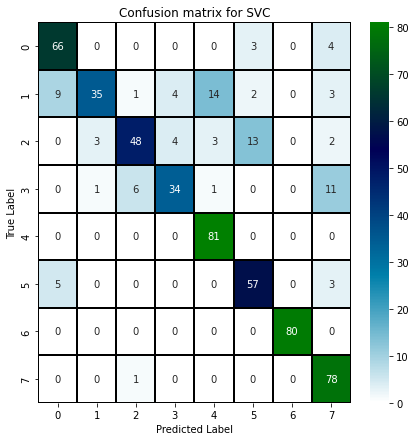

In [104]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVC")
plt.show()

# KNeighborsClassifier

In [105]:
# Checking Accuracy for KNeighborsClassifier
knn = KNN()
knn.fit(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)
print(accuracy_score(y_df_test,predknn))
print(confusion_matrix(y_df_test,predknn))
print(classification_report(y_df_test,predknn))

0.8951048951048951
[[71  0  0  0  0  0  0  2]
 [12 33  3  8  9  2  0  1]
 [ 0  2 64  2  0  5  0  0]
 [ 0  1  3 45  0  0  0  4]
 [ 0  0  1  0 80  0  0  0]
 [ 3  0  2  0  0 60  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.92      0.49      0.63        68
           2       0.88      0.88      0.88        73
           3       0.82      0.85      0.83        53
           4       0.90      0.99      0.94        81
           5       0.90      0.92      0.91        65
           6       1.00      1.00      1.00        80
           7       0.92      1.00      0.96        79

    accuracy                           0.90       572
   macro avg       0.89      0.89      0.88       572
weighted avg       0.90      0.90      0.89       572



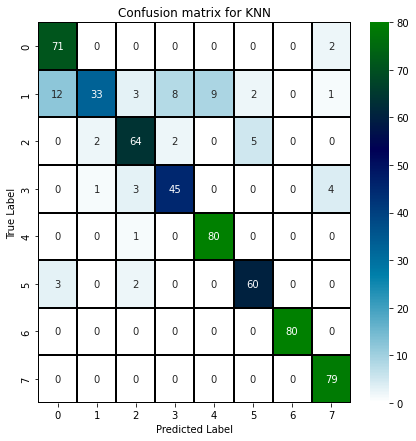

In [106]:
# Lets plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()

# GradientBoostingClassifier

In [107]:
# Checking Accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)
predGB = GB.predict(x_df_test)
print(accuracy_score(y_df_test,predGB))
print(confusion_matrix(y_df_test,predGB))
print(classification_report(y_df_test,predGB))

0.9300699300699301
[[70  2  0  0  0  1  0  0]
 [ 5 48  2  6  5  2  0  0]
 [ 0  3 62  4  1  3  0  0]
 [ 0  0  2 51  0  0  0  0]
 [ 0  0  0  0 81  0  0  0]
 [ 0  2  1  0  0 62  0  0]
 [ 0  1  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        73
           1       0.86      0.71      0.77        68
           2       0.93      0.85      0.89        73
           3       0.84      0.96      0.89        53
           4       0.93      1.00      0.96        81
           5       0.91      0.95      0.93        65
           6       1.00      0.99      0.99        80
           7       1.00      1.00      1.00        79

    accuracy                           0.93       572
   macro avg       0.92      0.93      0.92       572
weighted avg       0.93      0.93      0.93       572



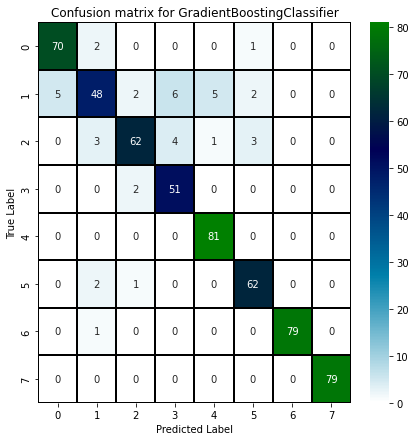

In [108]:
# Lets plot confusion matrix for GradientBoostingClassifier
cm = confusion_matrix(y_df_test,predGB)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for GradientBoostingClassifier")
plt.show()

# BaggingClassifier

In [109]:
# Checking Accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)
predBC = BC.predict(x_df_test)
print(accuracy_score(y_df_test,predBC))
print(confusion_matrix(y_df_test,predBC))
print(classification_report(y_df_test,predBC))

0.9213286713286714
[[68  3  1  0  0  1  0  0]
 [ 5 44  0 10  7  2  0  0]
 [ 0  5 61  3  1  3  0  0]
 [ 0  1  0 52  0  0  0  0]
 [ 0  1  0  0 80  0  0  0]
 [ 0  1  0  0  0 64  0  0]
 [ 0  0  1  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.80      0.65      0.72        68
           2       0.97      0.84      0.90        73
           3       0.80      0.98      0.88        53
           4       0.91      0.99      0.95        81
           5       0.91      0.98      0.95        65
           6       1.00      0.99      0.99        80
           7       1.00      1.00      1.00        79

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.91       572
weighted avg       0.92      0.92      0.92       572



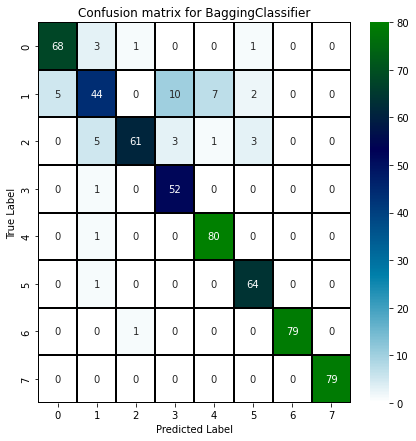

In [110]:
# Lets plot confusion matrix for BaggingClassifier
cm = confusion_matrix(y_df_test,predBC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for BaggingClassifier")
plt.show()

# Checking the cross Validation Score

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
# cv score for DecisionTreeClassifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.881824837684763


In [113]:
# cv score for RandomForestClassifier
print(cross_val_score(RFC,x_df,y_df,cv=5).mean())

0.9175452410553945


In [114]:
# cv score for SVC
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.8082898190357785


In [115]:
# cv score for KNNClassifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.855568448680757


In [116]:
# cv score for GradientBoostingClassifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.9096726067136345


In [117]:
# cv score for BaggingClassifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.9017916839342451


The difference between accuracy score and cross validation score of **Gradient Boosting Classifier** is  which is very less compared to other models. So we can conclude that **Gradient Boosting Classifier** as our best fitting model.

# Hyperparameter tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [120]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [121]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [122]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [123]:
primary_fuel = GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_df_train, y_df_train)
pred = primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

94.23076923076923


# Plotting ROC and compare AUC for the final model

Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

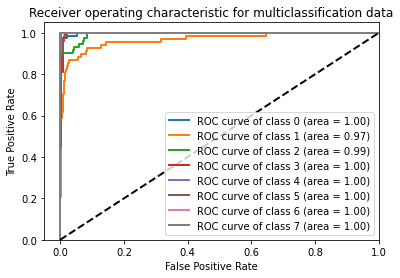

In [124]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the final model and is plotted False positive rate against True positive rate. Here we can observe the area of all the fuel types.

# Saving the model

In [125]:
# Saving the model using .pkl
import joblib
joblib.dump(primary_fuel,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

# Conclusion

* The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 85.76%.
* The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 91.66%.

In [126]:
model = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [127]:
import numpy as np
a = np.array(y_df_test)
predicted = np.array(model.predict(x_df_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,5,5
1,6,6
2,1,1
3,3,3
4,0,0
...,...,...
567,0,0
568,3,3
569,0,0
570,5,5
